In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
from twitterscraper import query_tweets
from twitterscraper.query import query_tweets_from_user
import datetime as dt 
import pandas as pd 


begin_date = dt.date(2020,7,1)
end_date = dt.date(2020,7,13)


limit = 100
lang = 'english'

#Use this to search a specific user

user = 'realDonaldTrump'
tweets = query_tweets_from_user(user)
df = pd.DataFrame(t.__dict__ for t in tweets)

df = df.loc[df['screen_name'] == user]

df = df['text']

df

#Use this if wanting to seach for a specific Phrase or word

#tweets = query_tweets('impeachment', begindate = begin_date, enddate = end_date, limit = limit, lang = lang)
#df = pd.DataFrame(t.__dict__ for t in tweets)

#df = df['text']

#df

INFO: Scraping tweets from https://twitter.com/realDonaldTrump
INFO: Using proxy 92.52.186.123:32329
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1282500772027142144&reset_error_state=false
INFO: Using proxy 113.160.206.37:55138
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1282022791857025025&reset_error_state=false
INFO: Using proxy 117.255.223.133:33978
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1281924965365882880&reset_error_state=false
INFO: Using proxy 27.68.135.14:30199
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1281760079558184960&reset_e

INFO: Using proxy 159.8.114.34:8123
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1273038952275095558&reset_error_state=false
INFO: Using proxy 90.188.10.59:47532
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1272521253136498690&reset_error_state=false
INFO: Using proxy 200.199.114.226:33932
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1272000237809414149&reset_error_state=false
INFO: Using proxy 191.103.219.225:48612
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1271772569943883776&reset_error_state=false
INFO: Using proxy 95.181.37.114:38464
INFO: Scr

0      Admiral Ronny Jackson (@RonnyJackson4TX) is a ...
1      Big Senate Race in Alabama on Tuesday. Vote fo...
2      Tony Gonzales (@TonyGonzales4TX) will be a GRE...
3      Congratulations to my friend President @Andrze...
5      The Lamestream Media is not talking about what...
6                        The Silent Majority will reign!
7      So hard to watch @FoxNews anymore. They are wo...
8      Never in history have Police been treated so b...
9      “Republican voter registration is way up, Demo...
10     Is this what you want for your President??? Wi...
11     We have now built 240 Miles of new Border Wall...
12     No, Radical Left anarchists, agitators, looter...
17     No, Radical Left anarchists, agitators, looter...
18     Thank you to J.R. Majewski, a great Air Force ...
19     I know many in business and politics that work...
20     We have now built 240 Miles of new Border Wall...
25     I disagreed with doing this very small (tiny) ...
26     Do RINO’S Pat Toomey & M

In [5]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Admiral', 'Ronny', 'Jackson', '(@RonnyJackson4TX)', 'is', 'a', 'very', 'successful', 'doctor', 'and', 'Navy', 'Veteran', 'running', 'for', 'Congress', 'in', '#TX13.', 'Strong', 'on', 'Crime,', 'the', 'Border', 'and', 'Agriculture', '—', 'and', 'he', 'loves', 'our', 'Vets!', 'Ronny', 'has', 'my', 'Complete', 'and', 'Total', 'Endorsement!', 'Vote', 'for', 'Ronny!https://secure.winred.com/texans-for-ronny-jackson/contribute', '…', 'Big', 'Senate', 'Race', 'in', 'Alabama', 'on', 'Tuesday.', 'Vote', 'for', '@TTuberville,', 'he', 'is', 'a', 'winner', 'who', 'will', 'never', 'let', 'you', 'down.', 'Jeff', 'Sessions', 'is', 'a', 'disaster', 'who', 'has', 'let', 'us', 'all', 'down.', 'We', 'don’t', 'want', 'him', 'back', 'in', 'Washington!', 'Tony', 'Gonzales', '(@TonyGonzales4TX)', 'will', 'be', 'a', 'GREAT', 'Congressman', 'for', 'Texas!', 'A', 'Navy', 'veteran,', 'he', 'is', 'Strong', 'on', 'the', 'Economy,', 'Life', 'and', 'the', 'Second', 'Amendment.', 'We', 'need', 'him', 'to', 'defeat'

In [6]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [7]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['admir',
 'ronni',
 'jackson',
 'ronnyjackson4tx',
 'is',
 'a',
 'veri',
 'success',
 'doctor',
 'and',
 'navi',
 'veteran',
 'run',
 'for',
 'congress',
 'in',
 'tx13',
 'strong',
 'on',
 'crime',
 'the',
 'border',
 'and',
 'agricultur',
 'and',
 'he',
 'love',
 'our',
 'vet',
 'ronni',
 'has',
 'my',
 'complet',
 'and',
 'total',
 'endors',
 'vote',
 'for',
 'ronnyhttpssecurewinredcomtexansforronnyjacksoncontribut',
 'big',
 'senat',
 'race',
 'in',
 'alabama',
 'on',
 'tuesday',
 'vote',
 'for',
 'ttubervill',
 'he',
 'is',
 'a',
 'winner',
 'who',
 'will',
 'never',
 'let',
 'you',
 'down',
 'jeff',
 'session',
 'is',
 'a',
 'disast',
 'who',
 'has',
 'let',
 'us',
 'all',
 'down',
 'we',
 'dont',
 'want',
 'him',
 'back',
 'in',
 'washington',
 'toni',
 'gonzal',
 'tonygonzales4tx',
 'will',
 'be',
 'a',
 'great',
 'congressman',
 'for',
 'texa',
 'a',
 'navi',
 'veteran',
 'he',
 'is',
 'strong',
 'on',
 'the',
 'economi',
 'life',
 'and',
 'the',
 'second',
 'amend',
 'we',
 '

In [8]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['admir',
 'ronni',
 'jackson',
 'ronnyjackson4tx',
 'veri',
 'success',
 'doctor',
 'navi',
 'veteran',
 'run',
 'congress',
 'tx13',
 'strong',
 'crime',
 'border',
 'agricultur',
 'love',
 'vet',
 'ronni',
 'complet',
 'total',
 'endors',
 'vote',
 'ronnyhttpssecurewinredcomtexansforronnyjacksoncontribut',
 'big',
 'senat',
 'race',
 'alabama',
 'tuesday',
 'vote',
 'ttubervill',
 'winner',
 'let',
 'jeff',
 'session',
 'disast',
 'let',
 'dont',
 'want',
 'washington',
 'toni',
 'gonzal',
 'tonygonzales4tx',
 'great',
 'congressman',
 'texa',
 'navi',
 'veteran',
 'strong',
 'economi',
 'life',
 'second',
 'amend',
 'need',
 'defeat',
 'radic',
 'left',
 'novemb',
 'toni',
 'complet',
 'total',
 'endors',
 'tx23httpssecurewinredcomtonygonzalesdon',
 'congratul',
 'friend',
 'presid',
 'andrzejduda',
 'poland',
 'histor',
 'reelect',
 'look',
 'forward',
 'continu',
 'import',
 'work',
 'togeth',
 'mani',
 'issu',
 'includ',
 'defens',
 'trade',
 'energi',
 'telecommun',
 'secur',
 

In [9]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [10]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 952, 2: 359, 3: 145, 4: 93, 5: 70, 6: 54, 7: 27, 8: 22, 10: 19, 9: 17, ...})

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

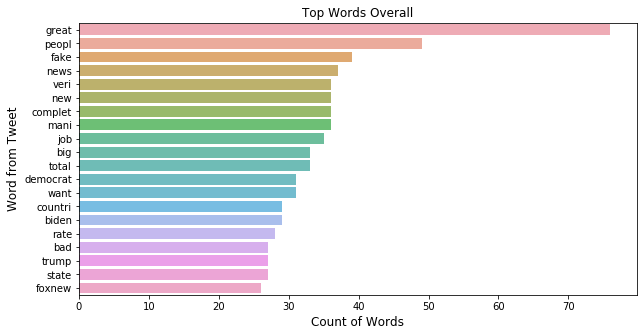

In [12]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()



In [13]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()



In [14]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [15]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


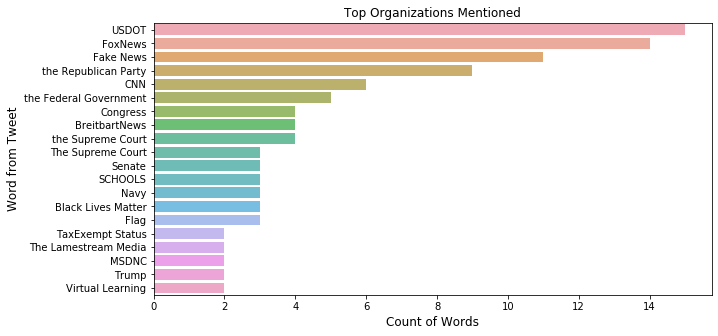

In [16]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [17]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


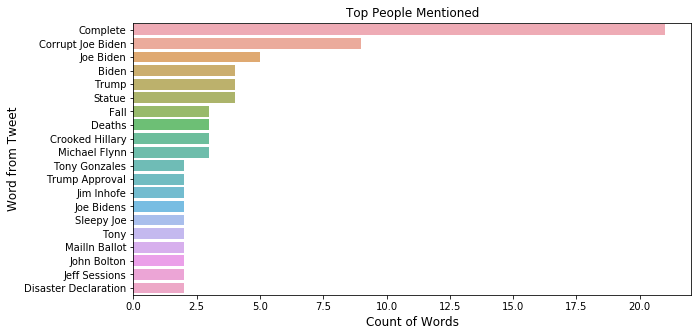

In [18]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()